#**BASIC DATA VISUALIZATION**

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [ ]:
print(df.head())
print(df.index)
print(df.columns)

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact
RangeIndex(start=0, stop=234, step=1)
Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


In [ ]:
for col in df:
    print(df[col].unique())

['audi' 'chevrolet' 'dodge' 'ford' 'honda' 'hyundai' 'jeep' 'land rover'
 'lincoln' 'mercury' 'nissan' 'pontiac' 'subaru' 'toyota' 'volkswagen']
['a4' 'a4 quattro' 'a6 quattro' 'c1500 suburban 2wd' 'corvette'
 'k1500 tahoe 4wd' 'malibu' 'caravan 2wd' 'dakota pickup 4wd'
 'durango 4wd' 'ram 1500 pickup 4wd' 'expedition 2wd' 'explorer 4wd'
 'f150 pickup 4wd' 'mustang' 'civic' 'sonata' 'tiburon'
 'grand cherokee 4wd' 'range rover' 'navigator 2wd' 'mountaineer 4wd'
 'altima' 'maxima' 'pathfinder 4wd' 'grand prix' 'forester awd'
 'impreza awd' '4runner 4wd' 'camry' 'camry solara' 'corolla'
 'land cruiser wagon 4wd' 'toyota tacoma 4wd' 'gti' 'jetta' 'new beetle'
 'passat']
[1.8 2.  2.8 3.1 4.2 5.3 5.7 6.  6.2 7.  6.5 2.4 3.5 3.6 3.  3.3 3.8 4.
 3.7 3.9 4.7 5.2 5.9 4.6 5.4 5.  1.6 2.5 2.7 6.1 4.4 5.6 2.2 3.4 1.9]
[1999 2008]
[4 6 8 5]
['auto(l5)' 'manual(m5)' 'manual(m6)' 'auto(av)' 'auto(s6)' 'auto(l4)'
 'auto(l3)' 'auto(l6)' 'auto(s5)' 'auto(s4)']
['f' '4' 'r']
[18 21 20 16 19 15 17 14 11 1

In [ ]:
df

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

This dataset provides fuel economy data from 1999 and 2008 for 38 popular models of cars.


1.   manufacturer, yakni pabrikan pembuat mobil.
2.   model, yakni jenis/versi mobil.
3.   displ (displacement), yakni volume mesin sebagai alat ukur tenaga yang dihasilkan.
4.   year, yakni tahun perakitan mobil.
5.   cyl (number of cylinders), yakni banyaknya silinder pada mesin mobil.
6.   trans (transmission type), yakni jenis transmisi mobil (0=otomatis, 1=manual).
7.   drv, yakni tipe kemudi (f=front wheel, r=rear wheel, 4=4 wheel).
8.   cty (miles/(us) gallon), yakni jarak tempuh suatu mobil dibandingkan dengan konsumsi 1 galon bahan bakar dalam rute kota.
9.   hwy (miles/(us) gallon), yakni jarak tempuh suatu mobil dibandingkan dengan konsumsi 1 galon bahan bakar dalam rute jalan tol.
10.  fl (fuel type), yakni jenis bahan bakar yang digunakan.
11.   class (vehicle class), yakni kelas mobil.

## Correlation

### Scatter Plot



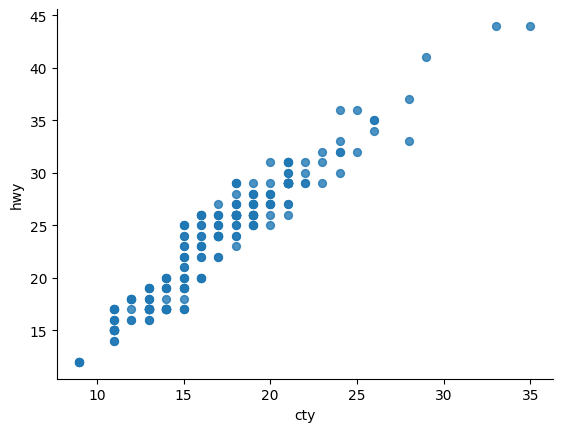

In [ ]:
df.plot(kind='scatter', x='cty', y='hwy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

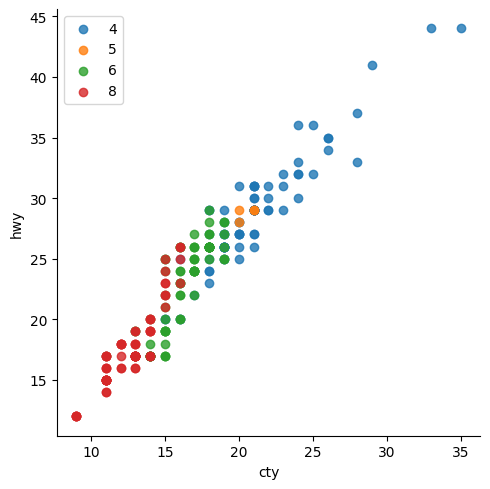

In [ ]:
sns.lmplot(x="cty", y="hwy", data=df, fit_reg=False, hue='cyl', legend=False)
plt.legend(loc='upper left')
plt.show()

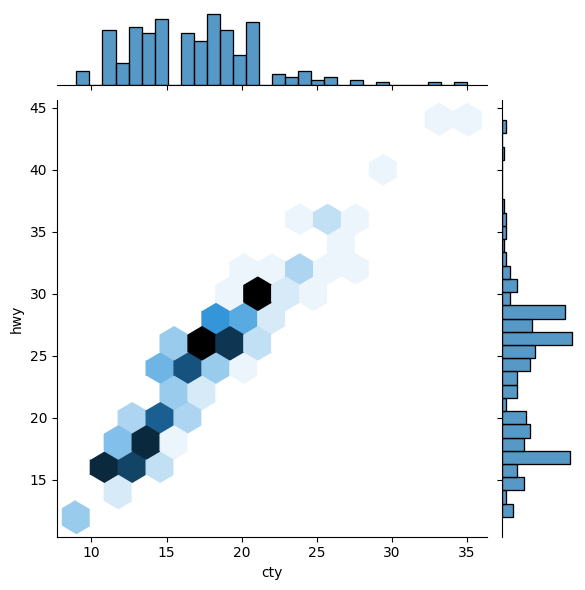

In [ ]:
sns.jointplot(x=df["cty"], y=df["hwy"], kind='hex', marginal_kws=dict(bins=30, fill=True))
plt.show()

### Correlogram

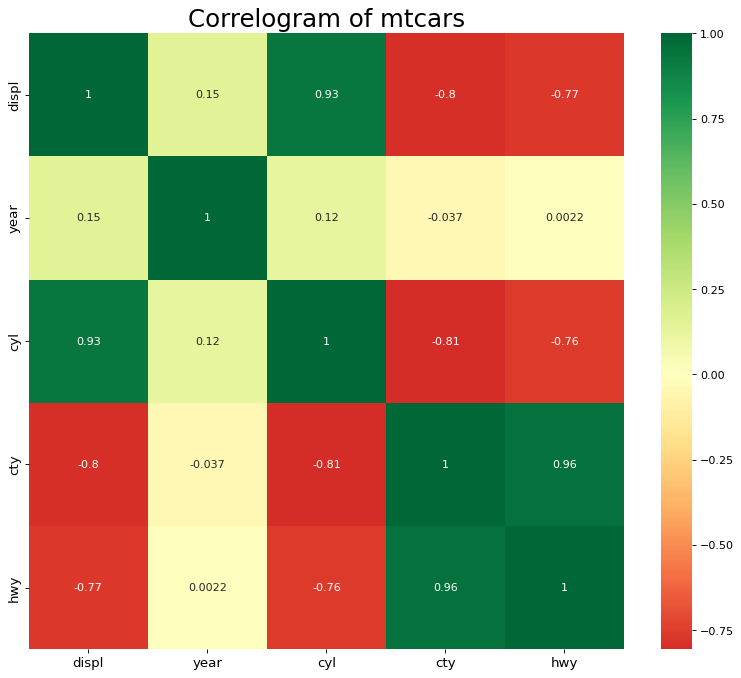

In [ ]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.select_dtypes(include=np.number).corr(), xticklabels=df.select_dtypes(include=np.number).corr().columns, yticklabels=df.select_dtypes(include=np.number).corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Distribution

### Bar Chart (Categorical Variable)

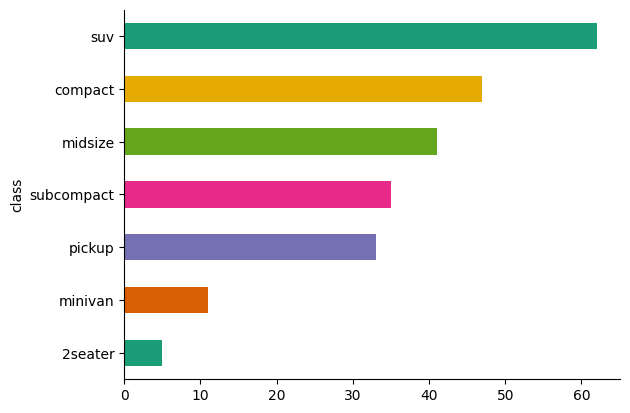

In [ ]:
df.groupby('class').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Box Plot

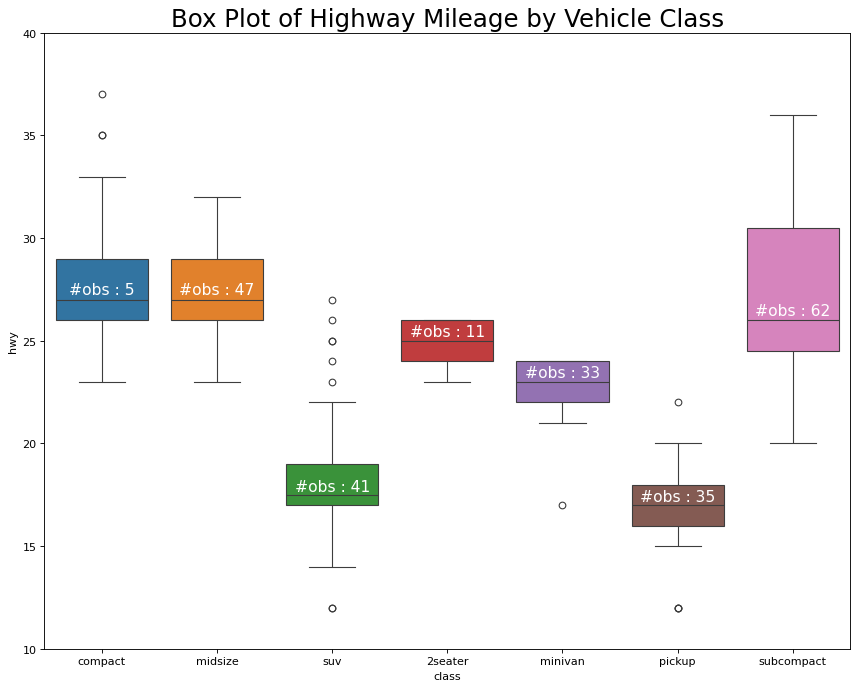

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='class', notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

### Violin Plot

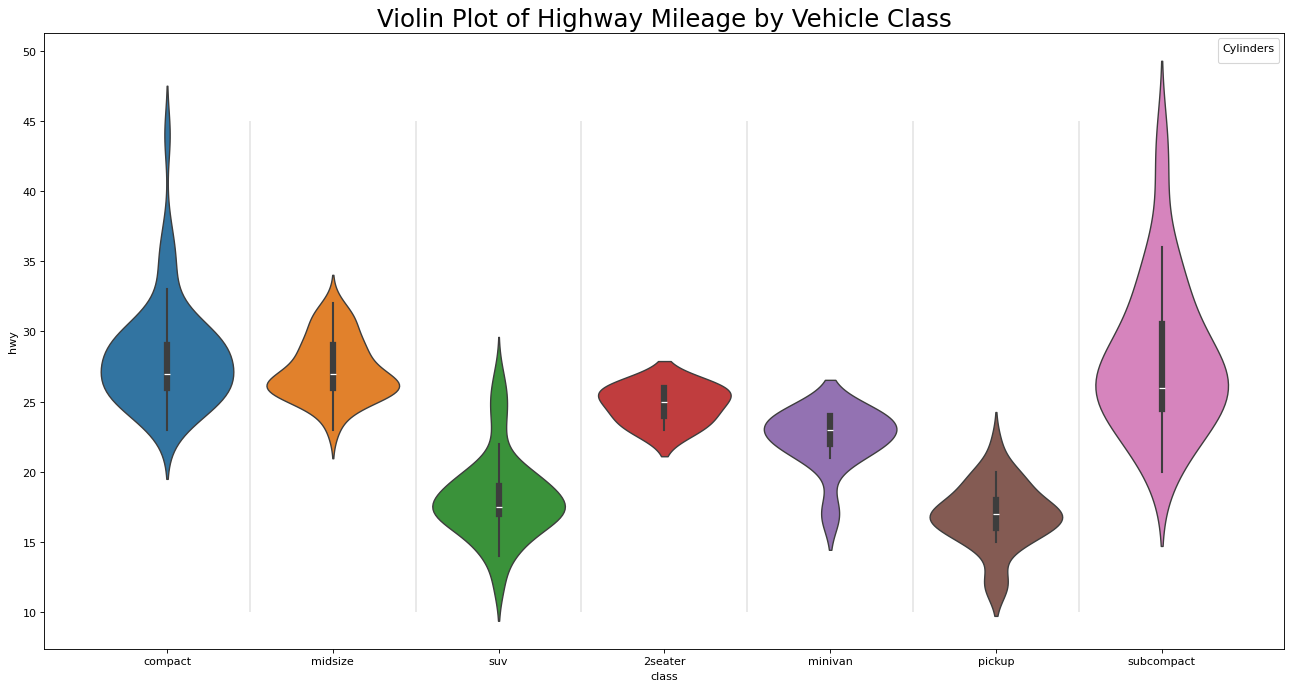

In [ ]:
# Draw Plot
plt.figure(figsize=(20,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, hue='class')

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

### Histogram Stacked (Continuous Variable)

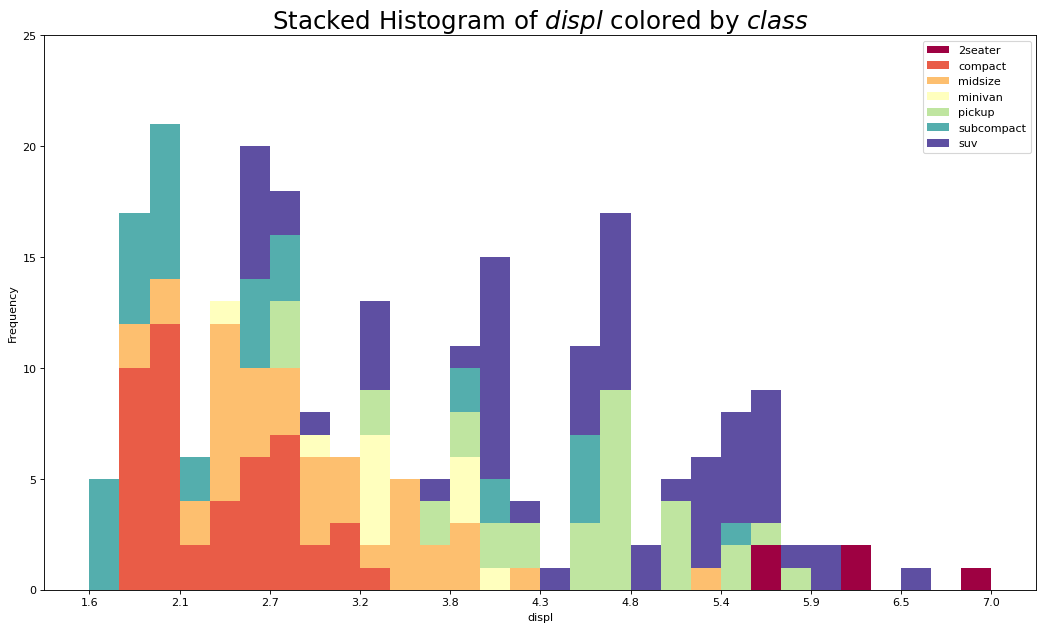

In [ ]:
# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

### Density Plot (Continuous Variable)

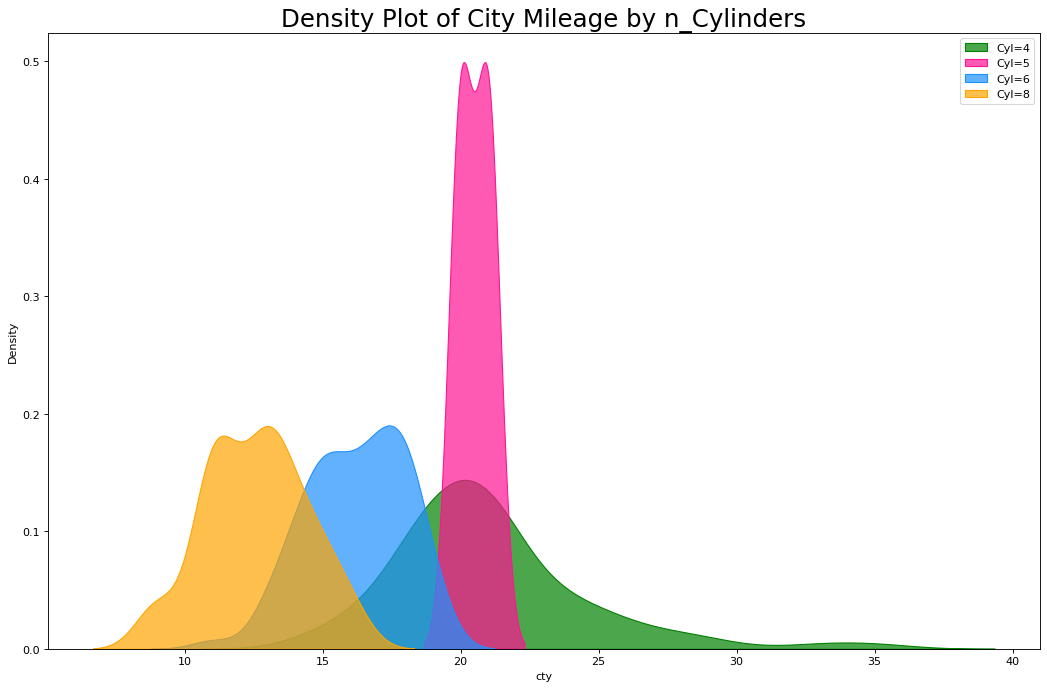

In [ ]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

### Density Curves with Histogram

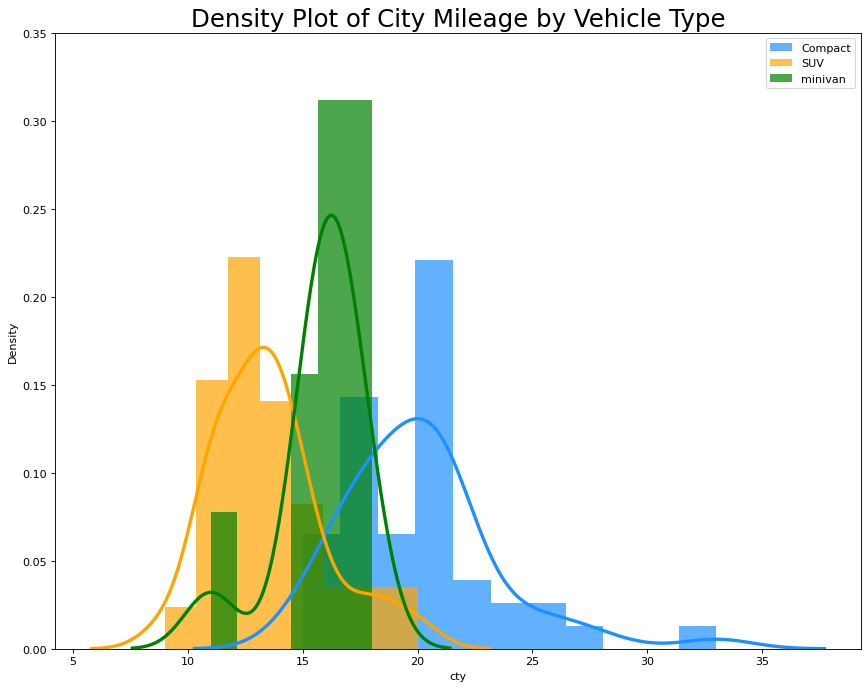

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

### Joy Plot

<Figure size 1280x800 with 0 Axes>

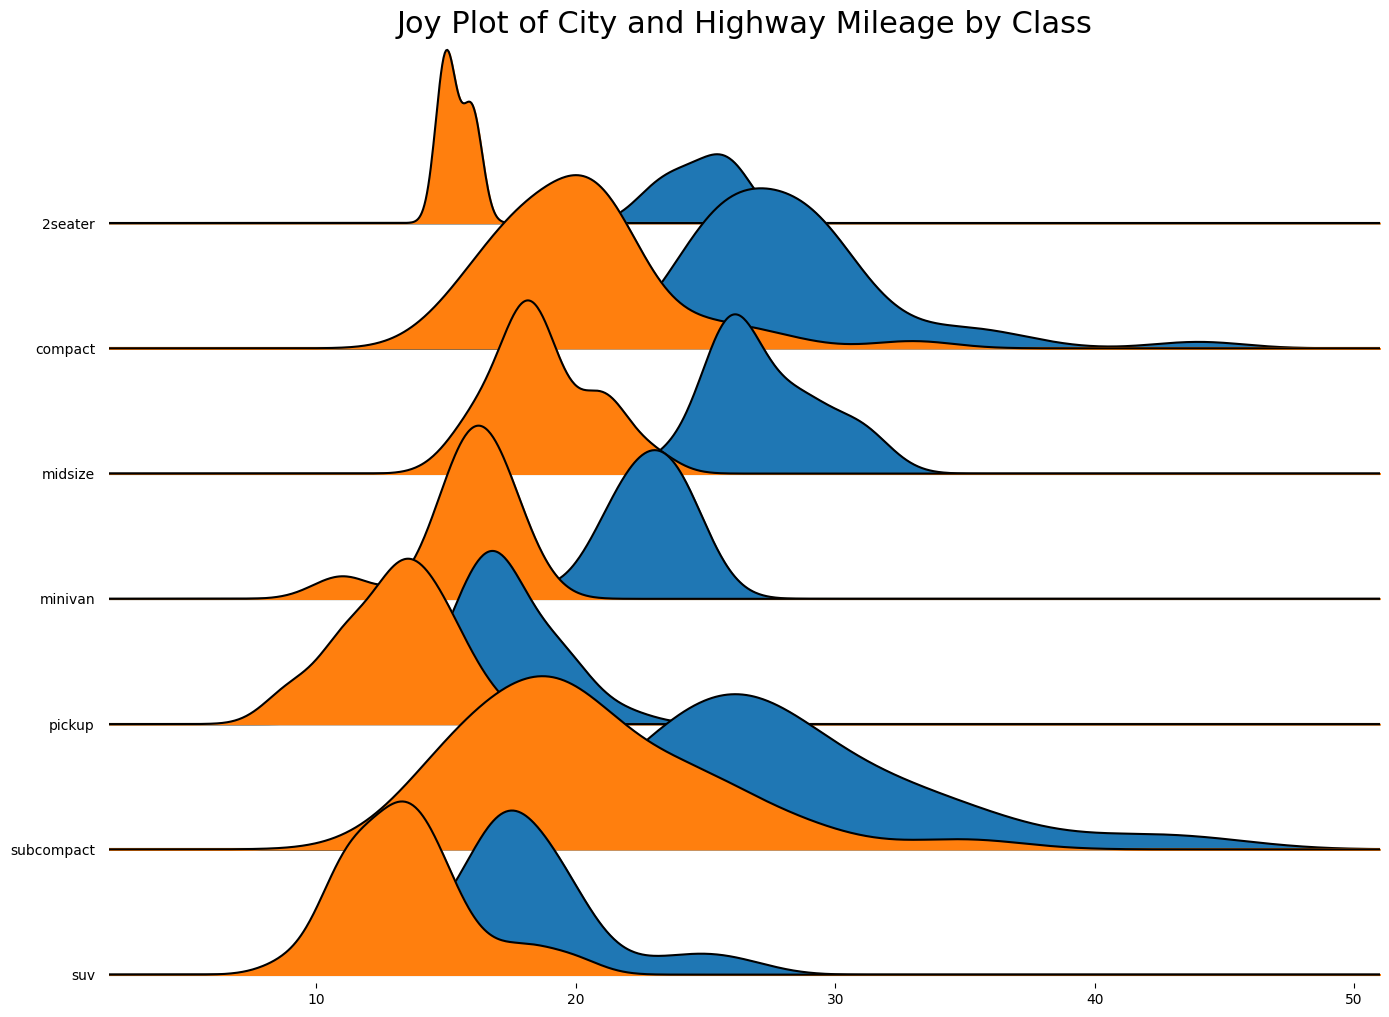

In [ ]:
!pip install joypy
import joypy

mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

## Deviation

### 1. Diverging Bar

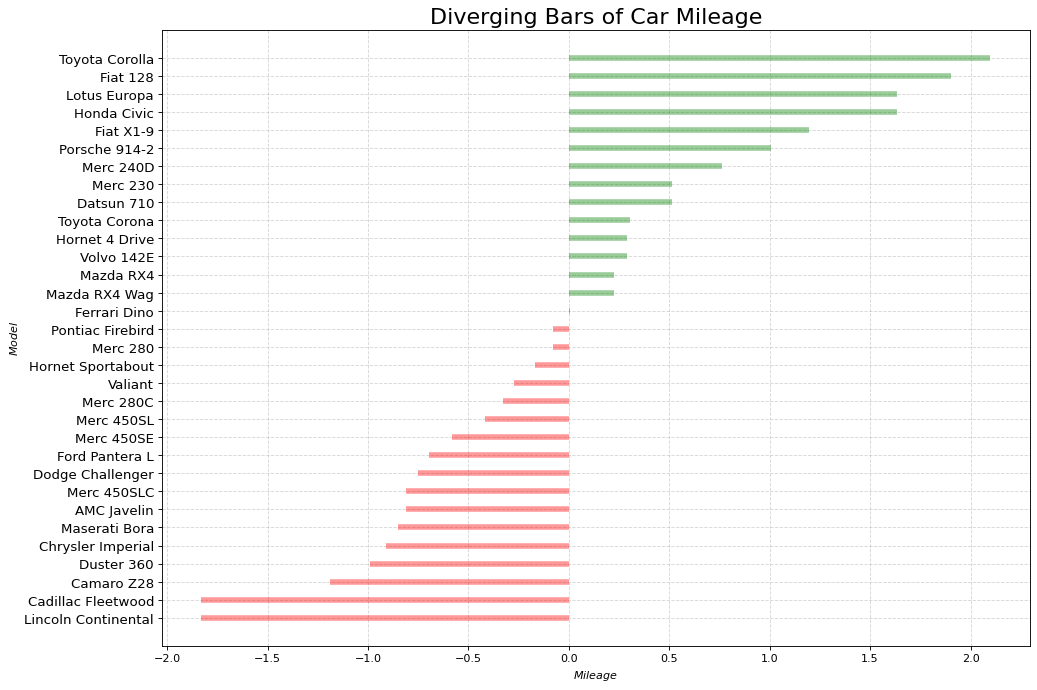

In [ ]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 2. Diverging Line

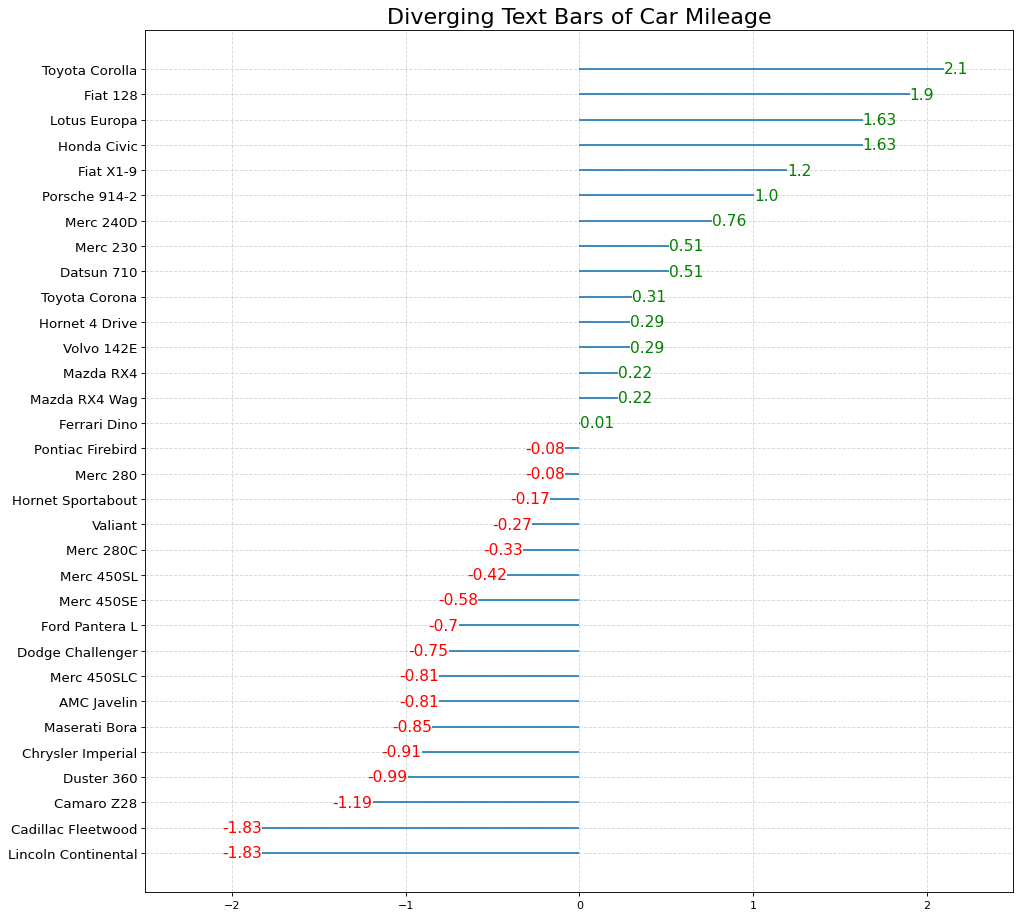

In [ ]:
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 3. Diverging Dot Plot

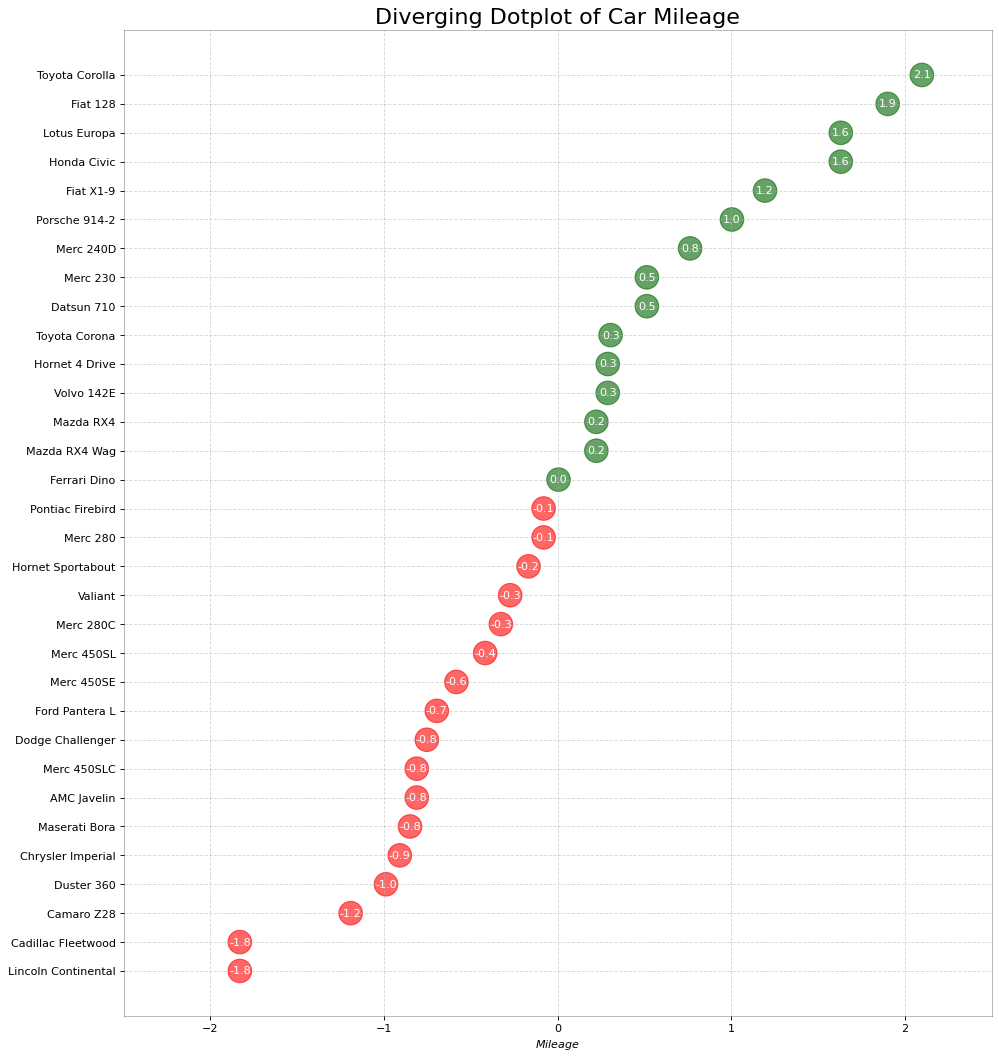

In [ ]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## Composition

### Pie Chart

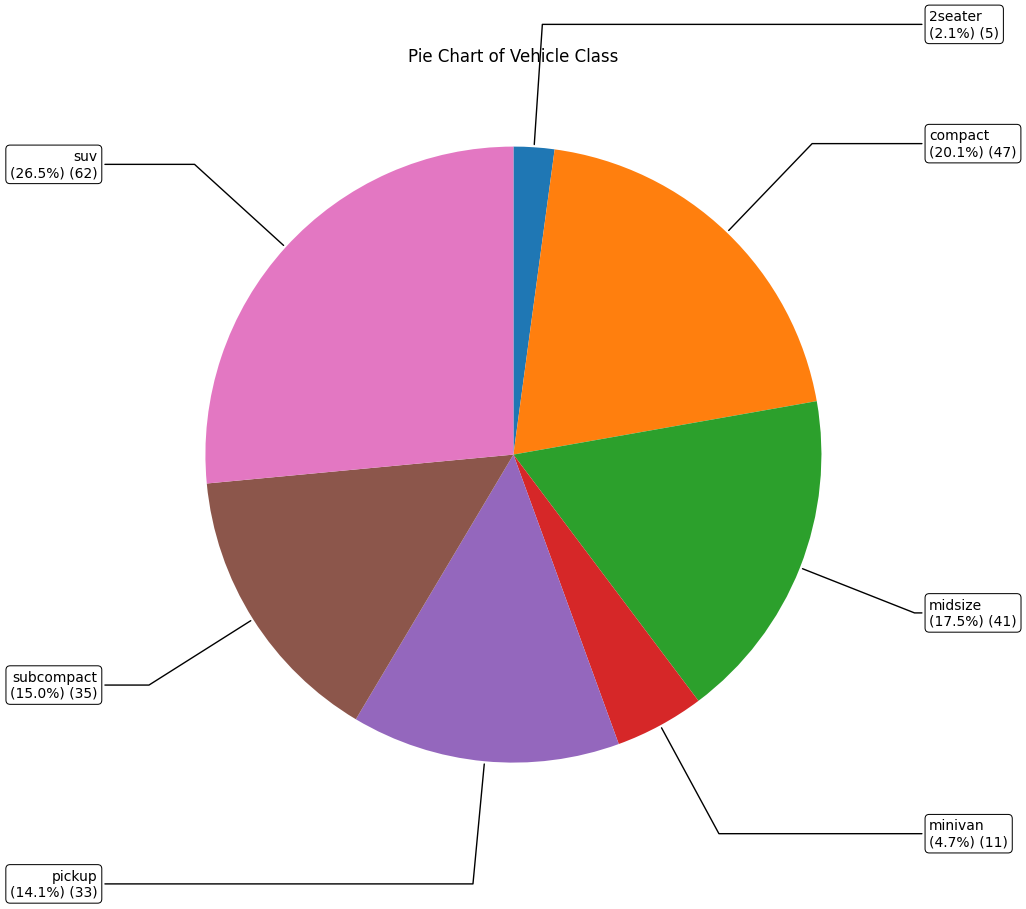

In [ ]:
# Prepare Data
df_2 = mpg.groupby('class').size()
total = df_2.sum()

# Get labels, percentages, and absolute values
labels = df_2.index
sizes = df_2.values
percentages = (sizes / total) * 100

# Draw Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the pie chart without default labels or autopct
wedges, _ = ax.pie(sizes, startangle=90, counterclock=False, autopct=None)

# Add custom labels outside the pie chart
bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1 # Mid-angle of the wedge
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    # Format the label string: "Category Name\n(Percentage%) (Absolute Value)"
    label_text = f"{labels[i]}\n({percentages[i]:.1f}%) ({sizes[i]:d})"

    # Adjust xytext to move labels further out
    ax.annotate(label_text, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pie Chart of Vehicle Class")
ax.set_ylabel("") # Remove default y-label if any
plt.show()

### Tree Chart

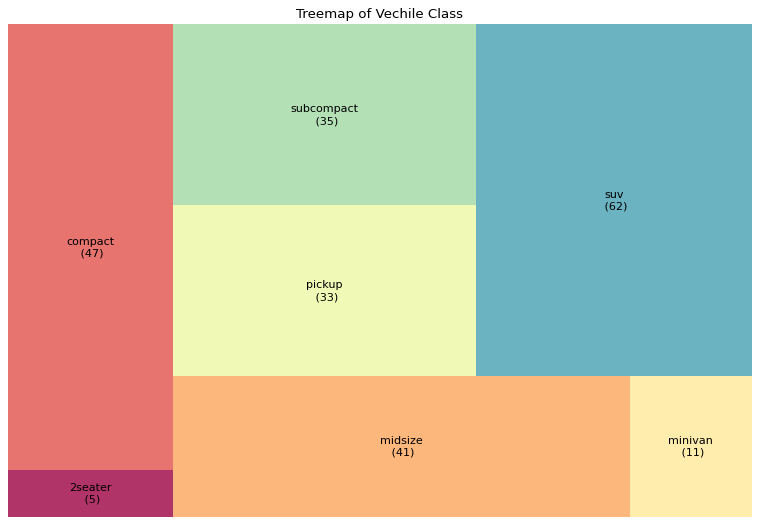

In [ ]:
!pip install squarify
import squarify

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

## Change (Time Series)

### Line Plot

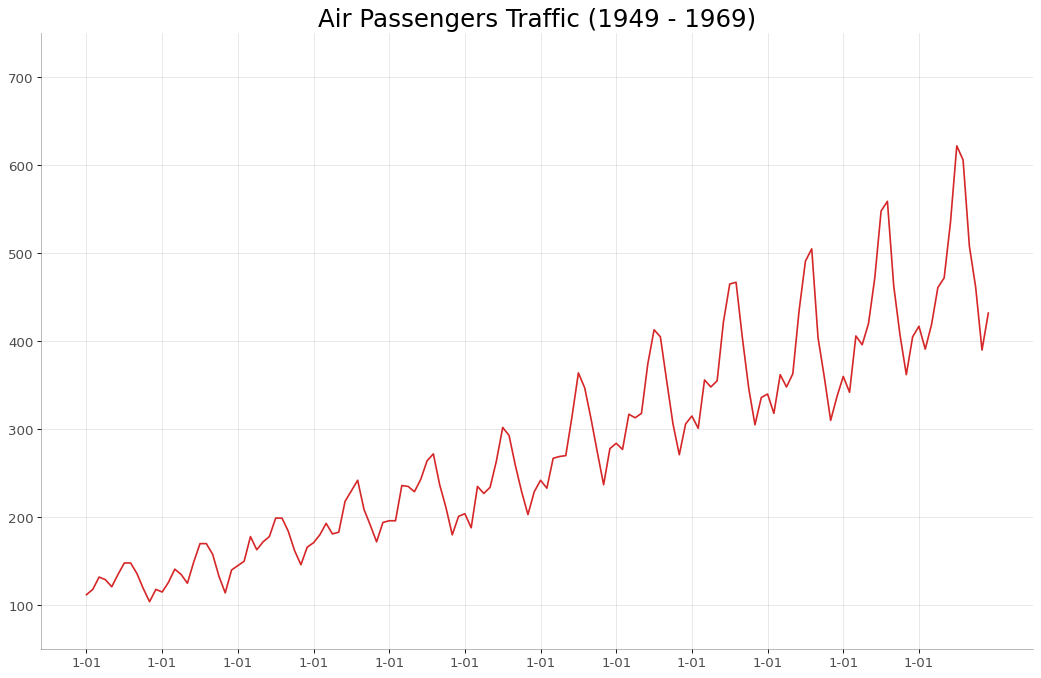

In [ ]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'value', data=df, color='tab:red')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

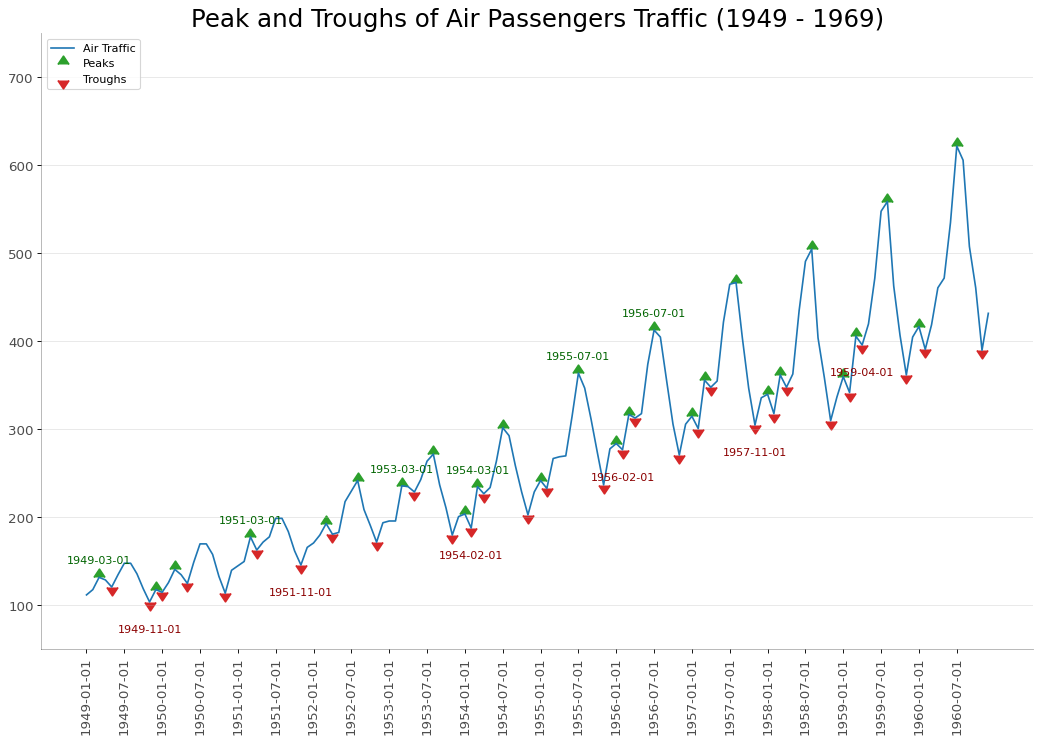

In [ ]:
# Get the Peaks and Troughs
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'value', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

### Line Plot (Dual Axis)

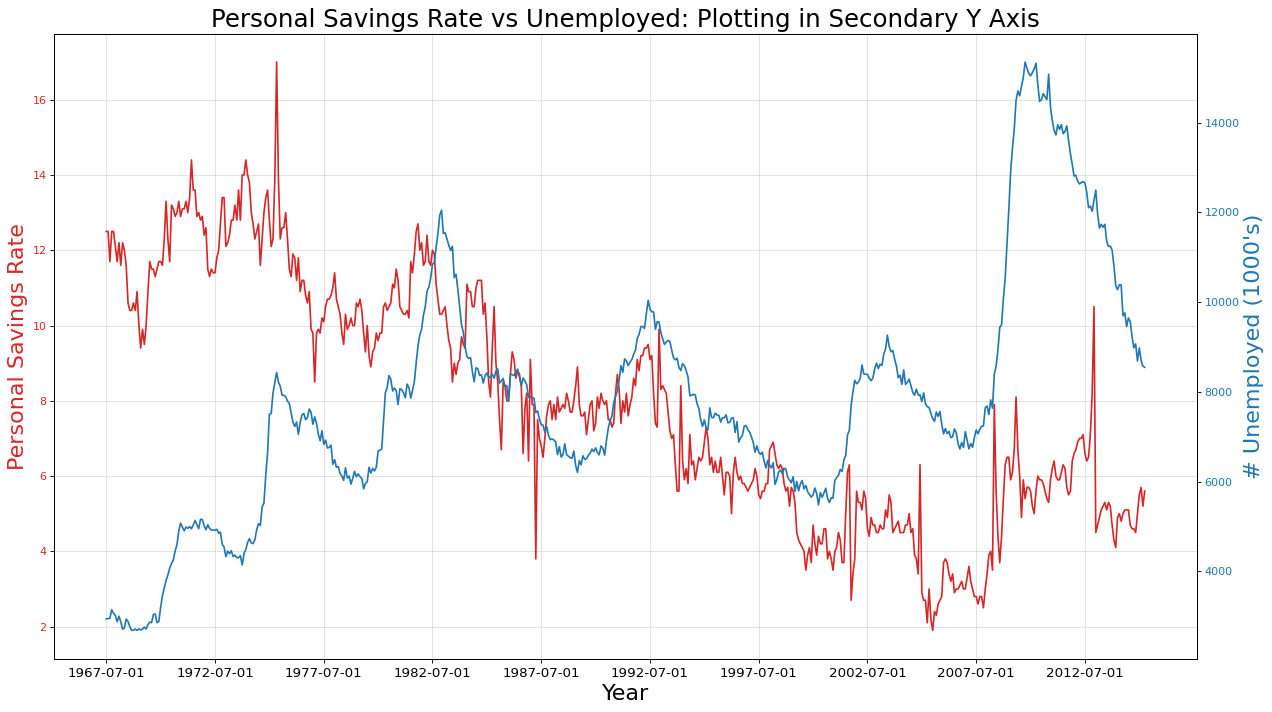

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()

### Area Chart

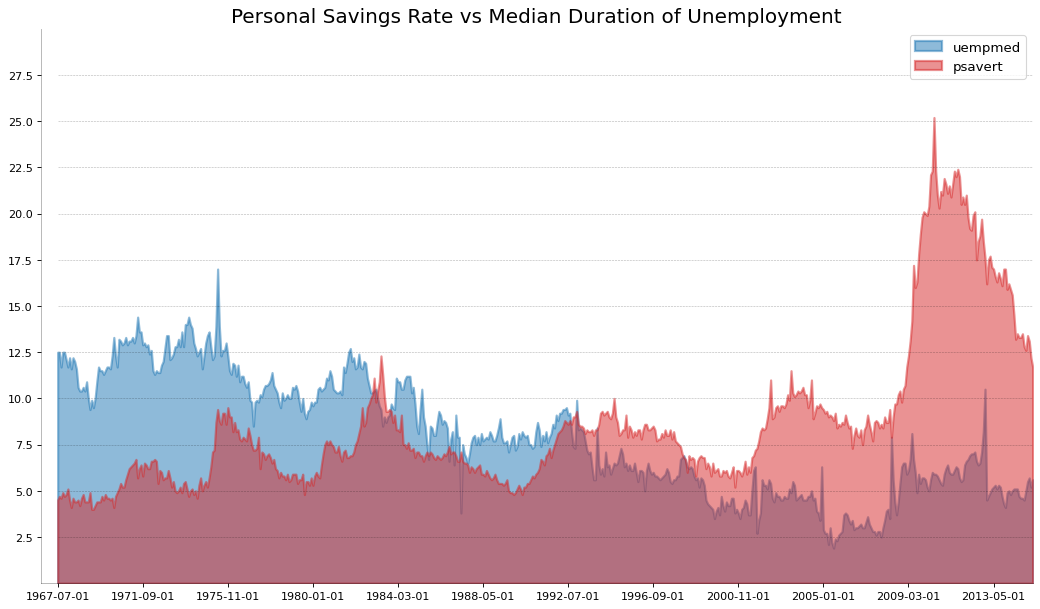

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

# Prepare Data
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']
columns = ['psavert', 'uempmed']

# Draw Plot
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# Draw Tick lines
for y in np.arange(2.5, 30.0, 2.5):
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

Referensi:

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

https://python-graph-gallery.com/

## Using Auto Viz Python Library

### Pandas Profiling

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

Referensi:

https://github.com/ydataai/ydata-profiling

### PyGWalker

In [ ]:
!pip install pygwalker
import pygwalker as pyg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.4 MB/s eta 0:00:00


In [ ]:
gwalker = pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-000648f12af01af4P7oAm9vXQqkTp0Of" style="height: auto">\n    <hea…

Referensi:

https://datamasteryacademy2023.medium.com/pygwalker-tutorial-a-tableau-like-python-library-for-interactive-data-exploration-and-7a22f36b00c9

https://levelup.gitconnected.com/pygwalker-a-python-library-for-visualizing-data-with-pandas-ff5fc6b59f33